# [2017-2020/03] Bay Wheels Ride Data Exploration and Visualization


## Introduction

Bay Wheels is a regional public cicyle sharing system in the San Francisco Bay Aea, operated by Motivate in a partnetship with the Metropolitan Transportation Commission and th Bay Area Air Quality Management District.

On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. 

Bay Wheels data is made accessible and usable by Lyft via the following link:
https://www.lyft.com/bikes/bay-wheels/system-data

**In this notebook, we will analyze data from January 2017 to March 2020. During this period, there were more than 5 million bicycle races in the San Francisco Bay Area.**


## Gathering Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os 
import glob
import os.path

In [2]:
folder_name = 'baywheels'
df = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
comb_data = pd.concat(df, ignore_index = True)
print(comb_data.shape)

C:\Users\macbi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\macbi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\macbi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(5795411, 15)


In [3]:
# Export to CSV
comb_data.to_csv('comb_data.csv', index = False, encoding = 'utf-8-sig')

In [4]:
# Read the new file as Dataframe
df = pd.read_csv('comb_data.csv')
df.sample(10)

C:\Users\macbi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
4502745,267,2019-10-07 17:54:56.0180,2019-10-07 17:59:23.4650,380.0,Masonic Ave at Turk St,37.779047,-122.447291,53.0,Grove St at Divisadero,37.775946,-122.437777,2508,Subscriber,No,NaN
3826839,583,2019-07-24 16:50:47,2019-07-24 17:00:31,NaN,NaN,37.769998,-122.450215,107.0,17th St at Dolores St,37.763015,-122.426497,485278,Subscriber,NaN,app
4411262,620,2019-10-19 10:27:06.2630,2019-10-19 10:37:26.6510,130.0,22nd St Caltrain Station,37.757704,-122.391885,81.0,Berry St at 4th St,37.775880,-122.393170,10253,Customer,No,NaN
3668902,183,2019-07-24 10:19:47.8920,2019-07-24 10:22:51.0660,181.0,Grand Ave at Webster St,37.811377,-122.265192,196.0,Grand Ave at Perkins St,37.808894,-122.256460,476,Subscriber,No,NaN
5558416,572,2020-02-27 15:36:46,2020-02-27 15:46:19,NaN,NaN,37.790590,-122.392526,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,777710,Subscriber,NaN,clipper
891213,953,2018-04-18 19:46:07.1260,2018-04-18 20:02:00.9960,22.0,Howard St at Beale St,37.789756,-122.394643,74.0,Laguna St at Hayes St,37.776435,-122.426244,2248,Subscriber,No,NaN
3536081,361,2019-06-14 16:19:14.2060,2019-06-14 16:25:16.1340,254.0,Vine St at Shattuck Ave,37.880222,-122.269592,245.0,Downtown Berkeley BART,37.870139,-122.268422,3549,Subscriber,No,NaN
1172770,274,2018-06-26 18:02:28.4770,2018-06-26 18:07:03.0140,66.0,3rd St at Townsend St,37.778742,-122.392741,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,2818,Subscriber,No,NaN
535384,774,2018-01-28 09:31:29.8540,2018-01-28 09:44:24.1090,70.0,Central Ave at Fell St,37.773311,-122.444293,119.0,18th St at Noe St,37.761047,-122.432642,2477,Subscriber,No,NaN
252990,671,2017-10-11 17:24:55.3830,2017-10-11 17:36:06.5850,58.0,Market St at 10th St,37.776619,-122.417385,25.0,Howard St at 2nd St,37.787522,-122.397405,2460,Subscriber,NaN,NaN


## Assessing Data

In [5]:
df.shape

(5795411, 15)

In [6]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
rental_access_method        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795411 entries, 0 to 5795410
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 663.2+ MB


#### What is the first look structure of the dataset ? 

The dataframe (called df and then df_clean) includes 5,795,411 entries and 15 columns (before cleaning) : 
- duration_sec 
- start_time 
- end_time 
- start_station_id 
- start_station_name 
- start_station_latitude
- start_station_longitude
- end_station_id
- end_station_name
- end_station_latitude
- end_station_longitude
- bike_id
- user_type
- bike_share_for_all_trip
- rental_access_method


In [8]:
df.duplicated().sum()

7512

In [9]:
df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id            578807
start_station_name          576973
start_station_latitude           0
start_station_longitude          0
end_station_id              580455
end_station_name            578629
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip    1667966
rental_access_method       5056715
dtype: int64

In [10]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,5.795411e+06,5.216604e+06,5.795411e+06,5.795411e+06,5.214956e+06,5.795411e+06,5.795411e+06,5.795411e+06
mean,8.496090e+02,1.341785e+02,3.776353e+01,-1.223520e+02,1.310317e+02,3.776315e+01,-1.223497e+02,6.687199e+04
std,2.233872e+03,1.158862e+02,1.434050e-01,3.410302e-01,1.150914e+02,2.011897e-01,5.704336e-01,1.863825e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225758e+02,4.000000e+00
25%,3.600000e+02,3.900000e+01,3.776971e+01,-1.224136e+02,3.300000e+01,3.777003e+01,-1.224117e+02,1.640000e+03
50%,5.720000e+02,9.500000e+01,3.778053e+01,-1.223989e+02,9.200000e+01,3.778079e+01,-1.223984e+02,3.159000e+03
75%,8.930000e+02,2.090000e+02,3.779539e+01,-1.223881e+02,2.000000e+02,3.779539e+01,-1.223881e+02,9.600000e+03
max,9.121100e+05,5.210000e+02,4.551000e+01,0.000000e+00,5.210000e+02,4.551000e+01,0.000000e+00,9.999600e+05


## Cleaning Data

In [11]:
# Creates copies for security 
df_clean = df.copy()

In [12]:
# Removes usefulness columns for our analysis 
df_clean.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'rental_access_method', 'bike_share_for_all_trip'], axis = 1, inplace = True)

In [13]:
# Removes rows without station id 
df_clean = df_clean[~df_clean.start_station_id.isna()]
df_clean = df_clean[~df_clean.end_station_id.isna()]

In [14]:
# Turns types into datetime format
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [30]:
# Adds new columns for trip duration and trip start
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')
df_clean['end_time_month'] = df_clean['end_time'].dt.strftime('%B')
df_clean['start_time_month_num'] = df_clean['start_time'].dt.month.astype(int)
df_clean['end_time_month_num'] = df_clean['end_time'].dt.month.astype(int)
df_clean['start_time_dayofweek'] = df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour
df_clean['duration_min'] = df_clean['duration_sec'] / 60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

In [103]:
# Turns user_type into category format
df_clean.user_type = df_clean.user_type.astype('category')
df_clean['start_time_month'] = pd.Categorical(df_clean['start_time_month'], categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered = True)

In [18]:
# Turns bike_id, start_station_id and end_station_id into object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

In [ ]:
# Drops null values 
df_clean.drop(df_clean[df_clean.start_station_id.isnull()].index, inplace = True)
df_clean.drop(df_clean[df_clean.start_station_name.isnull()].index, inplace = True)
df_clean.drop(df_clean[df_clean.end_station_id.isnull()].index, inplace = True)
df_clean.drop(df_clean[df_clean.end_station_name.isnull()].index, inplace = True)

## Finalized Dataset

We can observe the finalized dataset after various manipulations aimed at cleaning it and making it ready for our analyses.

In [22]:
df_clean.shape

(5124358, 18)

In [23]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,bike_share_for_all_trip,start_time_month,end_time_month,start_time_month_num,end_time_month_num,start_time_dayofweek,start_time_hour,end_time_hour,duration_min
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,43.0,San Francisco Public Library (Grove St at Hyde...,96,Customer,NaN,December,January,12,1,Sun,16,15,1335
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284.0,Yerba Buena Center for the Arts (Howard St at ...,96.0,Dolores St at 15th St,88,Customer,NaN,December,January,12,1,Sun,15,13,1313
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245.0,Downtown Berkeley BART,245.0,Downtown Berkeley BART,1094,Customer,NaN,December,January,12,1,Sun,22,11,762
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60.0,8th St at Ringold St,5.0,Powell St BART Station (Market St at 5th St),2831,Customer,NaN,December,January,12,1,Sun,17,10,1036
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239.0,Bancroft Way at Telegraph Ave,247.0,Fulton St at Bancroft Way,3167,Subscriber,NaN,December,January,12,1,Sun,14,2,726


In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5124358 entries, 0 to 5793341
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   end_station_id           object        
 6   end_station_name         object        
 7   bike_id                  object        
 8   user_type                category      
 9   bike_share_for_all_trip  category      
 10  start_time_month         object        
 11  end_time_month           object        
 12  start_time_month_num     int32         
 13  end_time_month_num       int32         
 14  start_time_dayofweek     object        
 15  start_time_hour          int64         
 16  end_time_hour            int64         
 17  duration_min             in

In [26]:
# Save a clean backup of the dataset 
df_clean.to_csv('clean_data.csv', index = False, encoding = 'utf-8-sig')

### What is the finalized structure of the dataset ? 

The dataframe (called df and then df_clean) includes 5,795,411 entries and 15 columns (after cleaning) : 
- duration_sec 
- start_time 
- end_time 
- start_station_id 
- start_station_name 
- end_station_id
- end_station_name
- bike_id
- user_type

Added columns are : 
- start_time_month
- end_time_month
- start_time_month_num
- end_time_month_num
- start_time_dayofweek
- start_time_hour
- end_time_hour
- duration_min

Deleted columns are : 
- start_station_latitude
- start_station_longitude
- end_station_latitude
- end_station_longitude
- bike_share_for_all_trip
- rental_access_method

### What is/are the main feature(s) of interest in your dataset ? 
- We would like to observe the distribution of trips by time 
- We would like to observe the most popular stations in the dataset
- We would like to observe the possible differences between customers and subscribers


### What features in the dataset do you think will help support your investigation into your feature(s) of interest ? 
- start_time and end_time
- user_type
- duration
- start_station_id and end_station_id

## Univariate Exploration

We take a first look of the distribution of data by plotting general histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A16043E088>,
      dtype=object)

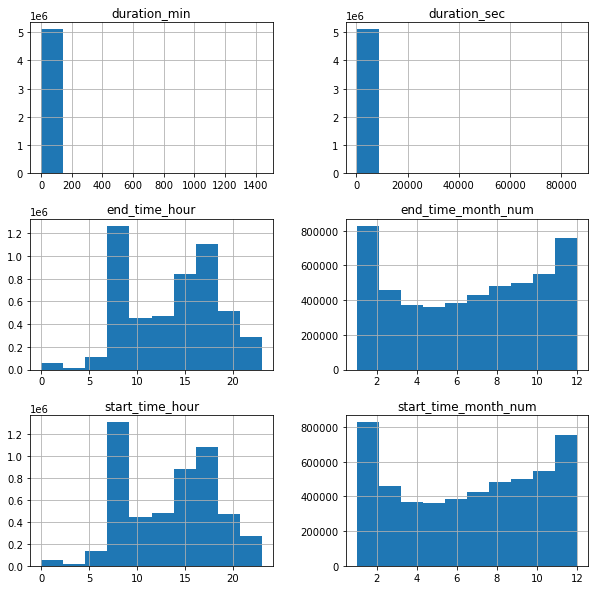

In [127]:
df_clean.hist(figsize = (10, 10))

#### What is the distribution of Subscribers vs Customers ?

First, we would like to observe the amount of each type of user (subscriber vs customer). A Subscriber is understood as a member and a customer as a casual user.

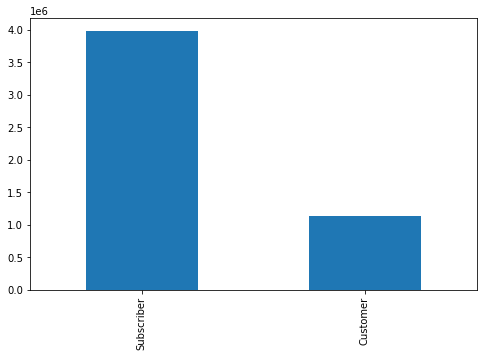

In [125]:
df_clean.user_type.value_counts().plot(kind = 'bar', figsize = (8, 5))

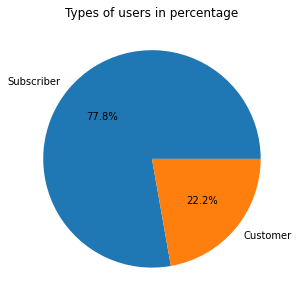

In [124]:
df_clean.user_type.value_counts().plot.pie(autopct = '%1.1f%%', figsize = (8, 5)) ; 
plt.title('Types of users in percentage')
plt.ylabel('')
plt.show()

We can observe that 78.7% of users are Subscribers and 21.3% are Customers.

#### What are the 20 more popular start and end stations ?

We would like to observe the top 20 stations both for starting and ending point.

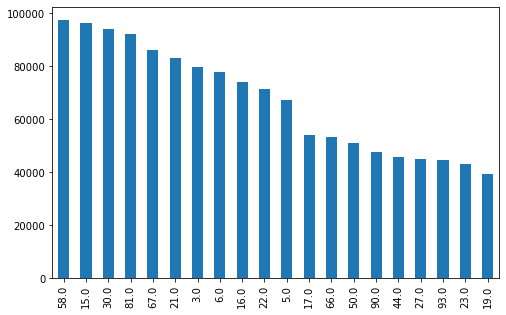

In [137]:
# Top 20 starting stations
df_clean.start_station_id.value_counts().head(20).plot(kind = 'bar', figsize = (8, 5))

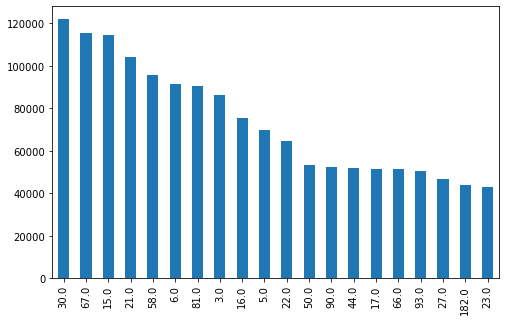

In [123]:
# Top 20 ending stations
df_clean.end_station_id.value_counts().head(20).plot(kind = 'bar', figsize = (8, 5))

We can see that stations 30, 15, 67, 58, 21, 3, 81 and 6 are popular.

#### What is the distribution of trips during the time ? 

We would like to observe the evolution of trips over time. 

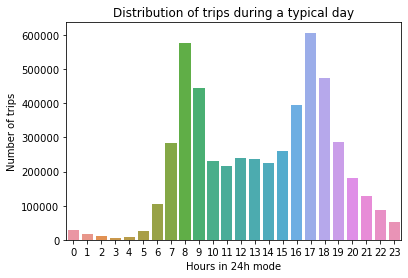

In [68]:
# Observes distribution of trips per hours
sns.countplot(df_clean['start_time_hour'])
plt.title('Distribution of trips during a typical day')
plt.xlabel('Hours in 24h mode')
plt.ylabel('Number of trips') 
plt.show()

In [31]:
df_clean['start_time_hour'].value_counts()

17    607079
8     575912
18    473811
9     445578
16    395268
19    286942
7     284480
15    260963
12    240825
13    235883
10    229935
14    225259
11    216266
20    181804
21    128565
6     103563
22     86234
23     51412
0      28357
5      26820
1      16441
2      10467
4       7131
3       5363
Name: start_time_hour, dtype: int64

We can observe two peaks of use around 7-9 am and 4-7 pm, which corresponds to the general start and end of work schedules.

Text(0.5, 0, 'Months')

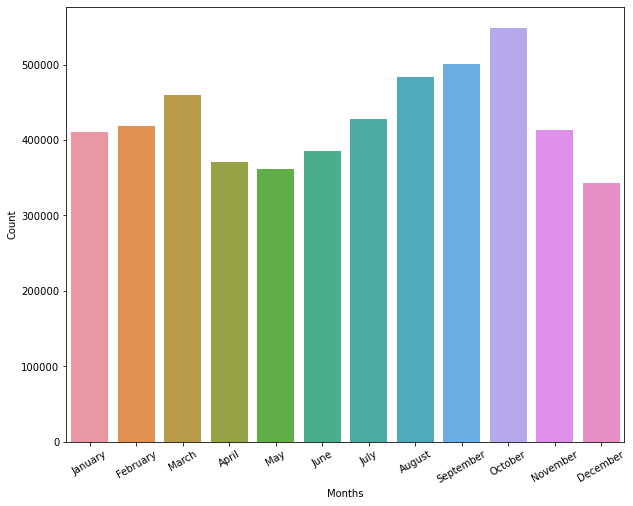

In [145]:
# Observes distribution of trips per month
fig = plt.subplots(figsize = (10, 8))
sns.countplot(df_clean['start_time_month'])
plt.xticks (rotation = 30)
plt.ylabel('Count')
plt.xlabel('Months')

We can observe a decline in activity in December which corresponds to the holiday season and winter. We can also see that activity drops in the months of April, May and June for no apparent reason.

#### What is the distribution of trips in termes of duration ?

Text(0.5, 0, 'Duration in seconds')

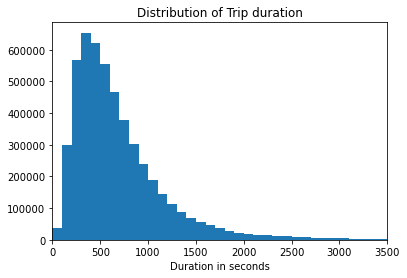

In [65]:
plotty = np.arange(0, df_clean['duration_sec'].max()+100, 100)
plt.hist(data = df_clean, x = 'duration_sec', bins = plotty)
plt.xlim(0, 3500)
plt.title('Distribution of Trip duration')
plt.xlabel('Duration in seconds')

The distribution is positevely skewed. We can observe that the typical trip last between few seconds to 1000 seconds which corresponds to 16-17 minutes.

Text(0.5, 1.0, 'Distribution of Trip duration')

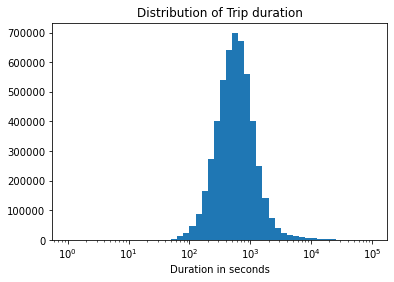

In [67]:
# Observes log scale of trips duration distribution
plotty = 10 ** np.arange(0, 5 + 0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_clean, x = 'duration_sec', bins = plotty)
plt.xticks(ticks, labels)
plt.xlabel('Duration in seconds')
plt.xscale('log')
plt.title('Distribution of Trip duration')

### Insights from Univariate Data Exploration

- We can observe that 78.7% of users are Subscribers and 21.3% are Customers.
- We can observe two peaks of use around 7-9 am and 4-7 pm, which corresponds to the general start and end of work schedules.
- We can see that stations 30, 15, 67, 58, 21, 3, 81 and 6 are popular.
- We can observe that the typical trip last between few seconds to 1000 seconds which corresponds to 16-17 minutes.
- We can observe a decline in activity in December which corresponds to the holiday season and winter. We can also see that activity drops in the months of April, May and June for no apparent reason.

## Bivariate Exploration



#### What is the trip duration distribution between customers and subscribers ? 

We would like to observe the duration of trips by type of users.

Text(0.5, 1.0, 'Distribution of trip duration')

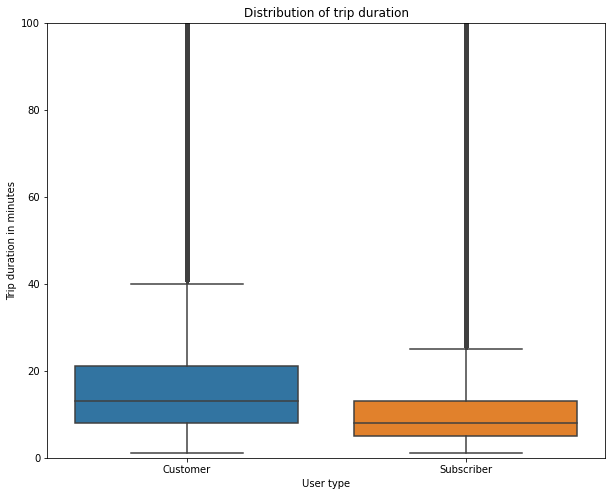

In [98]:
# Observes distribution of trip duration in minutes between customers and subscribers
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(data = df_clean, x = 'user_type', y = 'duration_min')
plt.xlabel('User type')
plt.ylim(0,100)
plt.ylabel('Trip duration in minutes')
plt.title('Distribution of trip duration')

We can observe that customers tend to use the service much longer than subscribers. However, we must note that a bias is likely. Indeed, since there are far fewer customers thant subscribers, it is possible that the data may be somewhat biased.

Text(0.5, 1.0, 'Distribution of trips within a day between customers and subscribers')

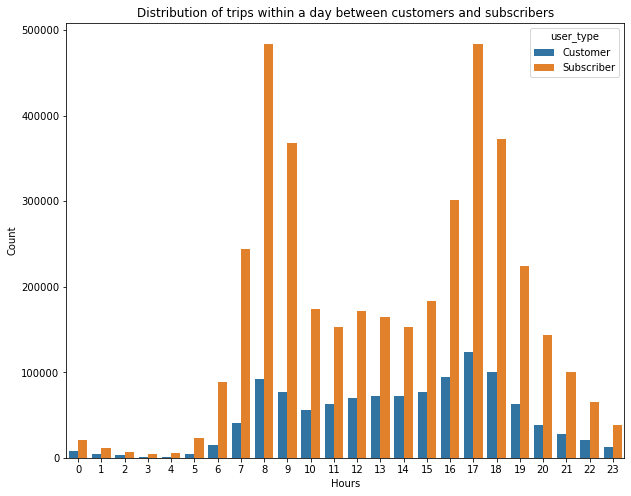

In [101]:
# Observes distribution of trips within a day between customers and subscribers
plt.rcParams['figure.figsize'] = 10, 8
sns.countplot(data = df_clean, x = 'start_time_hour', hue = 'user_type')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Distribution of trips within a day between customers and subscribers')

We can observe that subscribers trips follow a logical evolution according to the start and end times of work. The pattern is less marked concerning the customers, we can certainly notice some peaks of use at the hours of beginning and end of work but it not transcendent. 

Text(0, 0.5, 'Count')

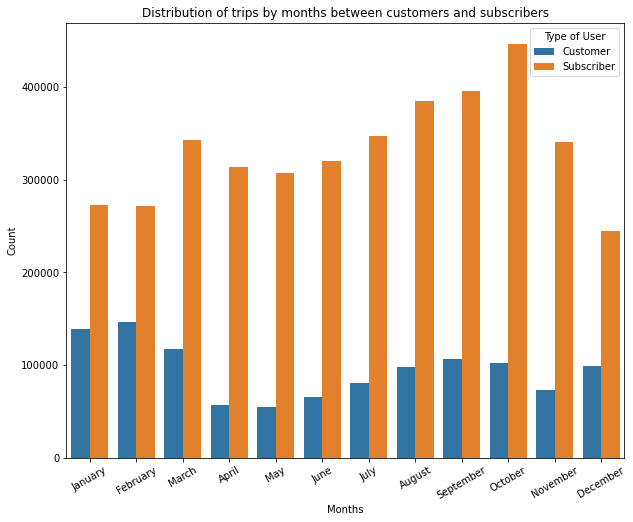

In [105]:
sns.countplot(df_clean['start_time_month'], hue = df_clean['user_type'])
plt.xticks(rotation = 30)
plt.legend(title = 'Type of User')
plt.title('Distribution of trips by months between customers and subscribers')
plt.xlabel('Months')
plt.ylabel('Count')

Generally speaking, the activity is more or less the same depending on whether the user is a customer or a subscriber. There are synchronous decreases in the spring during the months of April, May and June and a decrease in the winter for the month of December. Howewer, there are some asynchronous months such as the month of March, which is very active for subscribers and not very active for customers.

### Insights from Bivariate Data Exploration

- We can observe that customers tend to use the service much longer than subscribers. However, we must note that a bias is likely. Indeed, since there are far fewer customers thant subscribers, it is possible that the data may be somewhat biased.
- We can observe that subscribers trips follow a logical evolution according to the start and end times of work. The pattern is less marked concerning the customers, we can certainly notice some peaks of use at the hours of beginning and end of work but it not transcendent. 
- Generally speaking, the activity is more or less the same depending on whether the user is a customer or a subscriber. There are synchronous decreases in the spring during the months of April, May and June and a decrease in the winter for the month of December. Howewer, there are some asynchronous months such as the month of March, which is very active for subscribers and not very active for customers.

## Multivariate Exploration


#### How the duration of trips changes according to the type of user over the different months of the year ?

Text(0.5, 1.0, 'Variation of trip duration during the months')

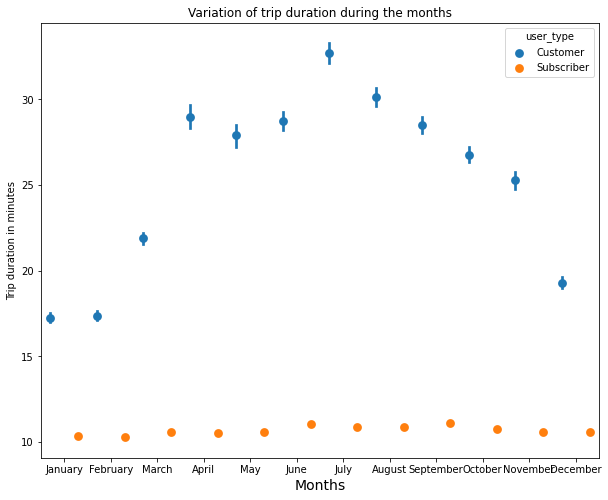

In [141]:
sns.pointplot(data = df_clean, x = 'start_time_month', y = 'duration_min', hue = 'user_type', dodge = 0.6, linestyles = '')
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Trip duration in minutes')
plt.title('Variation of trip duration during the months')

Text(0.5, 1.0, 'Variation of trip duration during the months')

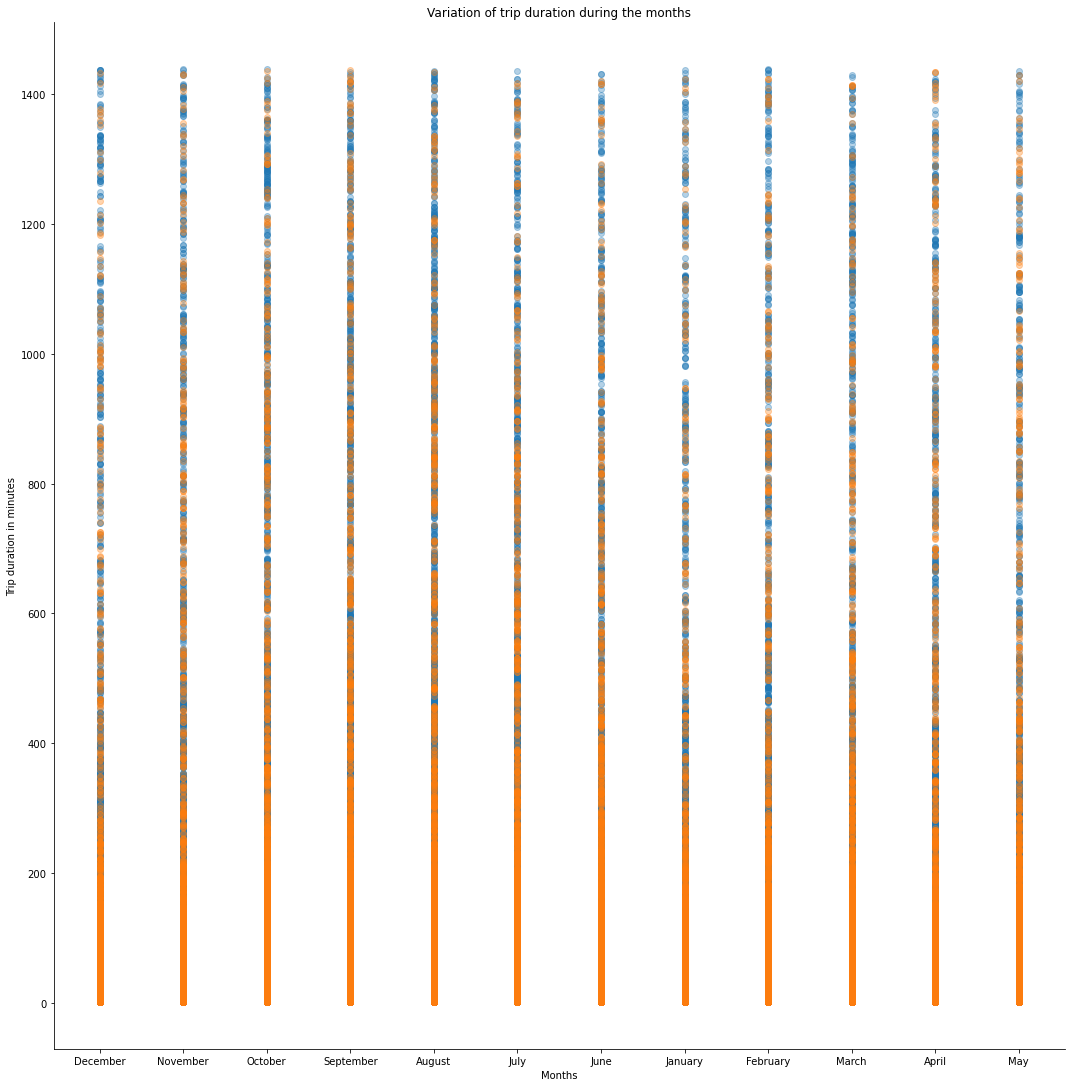

In [142]:
sns.FacetGrid(data = df_clean, hue = 'user_type', height = 15).map(plt.scatter, 'start_time_month', 'duration_min', alpha = 1/3)
plt.xlabel('Months')
plt.ylabel('Trip duration in minutes')
plt.title('Variation of trip duration during the months')

We can observe that, on average, travel times are longer for subscribers than for customers. We can also observe that the different seasons of the year have little impact on the average travel time of customers. On the othe hand, the seasons have a strong impact on the use of subscribers. Thus, subscribers, move over longer periods in summer (increase from June to August) and less in winter (decrease from December to March).

### Insights from Multivariate Data Exploration

- We can observe that, on average, travel times are longer for subscribers than for customers. We can also observe that the different seasons of the year have little impact on the average travel time of customers. On the othe hand, the seasons have a strong impact on the use of subscribers. Thus, subscribers, move over longer periods in summer (increase from June to August) and less in winter (decrease from December to March).

## Ressources

- https://en.wikipedia.org/wiki/Bay_Wheels
- https://www.lyft.com/bikes/bay-wheels/system-data
- https://towardsdatascience.com
- https://github.com/Markinger7/Communicate-Data-Findings
- https://github.com/samratdevkota/communicate-data-findings
- https://github.com/Tesers/Communicate-Data-Findings-Ford-GoBike-Dataset
- https://github.com/Kyungjin-Cho/Udacity-Nanodegree-DataAnalysis-5th
- https://github.com/Rajtra/Communicating_data_findings